In [7]:

!pip install torch torchvision torchaudio --quiet

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Name:Shivasri")
print("Register Number:212224220098 ")


# Upload your CSV file in Colab
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("\nDataset Preview:")
display(df.head())



Name:Shivasri
Register Number:212224220098 


Saving customer_segmentation_dataset.csv to customer_segmentation_dataset.csv

Dataset Preview:


,Age,Work_Experience,Family_Size,Spending_Score,Gender,Ever_Married,Segmentation
0,46,4,1,97,Male,Yes,0
1,19,17,2,92,Male,No,0
2,38,8,3,95,Female,No,0
3,31,12,1,34,Male,Yes,0
4,30,0,4,83,Male,Yes,0


/tmp/ipython-input-4248601971.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Name: Shivasri
Register Number: 212224220098

Training Output

Epoch [1/10], Loss: 1.3868
Epoch [2/10], Loss: 1.3861
Epoch [3/10], Loss: 1.3856
Epoch [4/10], Loss: 1.3850
Epoch [5/10], Loss: 1.3845
Epoch [6/10], Loss: 1.3840
Epoch [7/10], Loss: 1.3836
Epoch [8/10], Loss: 1.3831
Epoch [9/10], Loss: 1.3827
Epoch [10/10], Loss: 1.3823


Confusion Matrix
Name: Shivasri
Register Number: 212224220098

[[  0   2   0 118]
 [  0   3   0  82]
 [  0   3   0  94]
 [  0   3   0 123]]


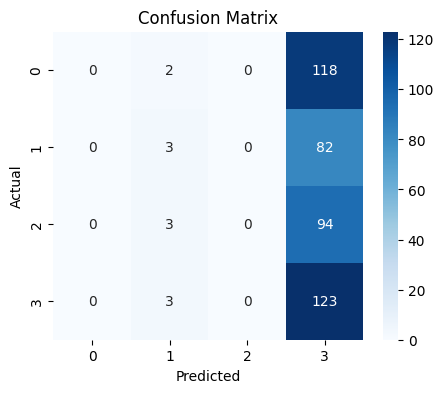


Classification Report
Name: Shivasri
Register Number: 212224220098

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.27      0.04      0.06        85
           2       0.00      0.00      0.00        97
           3       0.29      0.98      0.45       126

    accuracy                           0.29       428
   macro avg       0.14      0.25      0.13       428
weighted avg       0.14      0.29      0.15       428


New Sample Data Prediction
Name:Shivasri S
Register Number: 212224220098

Input Sample: [[-0.6272217   1.1003827  -0.00727291  0.23193596 -0.9746093  -0.98284924]]
Predicted Segment: D


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:

# ===============================
# DATA PREPROCESSING
# ===============================

# Drop ID column if exists
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Separate features and target
X = df.drop('Segmentation', axis=1)
y = df['Segmentation']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to Torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# ===============================
# STEP 2: DEFINE MODEL
# ===============================

class PeopleClassifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 4)
        )

    def forward(self, x):
        return self.model(x)

model = PeopleClassifier(X_train.shape[1])

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# Training
# -----------------------------
print("Name: Shivasri")
print("Register Number: 212224220098")
print("\nTraining Output\n")

epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# -----------------------------
# Evaluation
# -----------------------------
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)

cm = confusion_matrix(y_test, predicted)

print("\n\nConfusion Matrix")
print("Name: Shivasri")
print("Register Number: 212224220098\n")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report")
print("Name: Shivasri")
print("Register Number: 212224220098\n")
print(classification_report(y_test, predicted))

# -----------------------------
# New Sample Prediction
# -----------------------------
print("\nNew Sample Data Prediction")
print("Name:Shivasri S")
print("Register Number: 212224220098\n")

# Example sample (change values if needed)
sample = X_test[0].unsqueeze(0)

prediction = model(sample)
_, predicted_class = torch.max(prediction, 1)

segments = ["A", "B", "C", "D"]

print("Input Sample:", sample.numpy())
print("Predicted Segment:", segments[predicted_class.item()])
